# Movielens case study(Simplilearn)
   -Priyanka Joshi

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import the three datasets

In [2]:
#loading the dataset
users=pd.read_csv('users.dat',sep='::')
users.columns=['UserID','Gender','Age','Occupation','Zip-code']
users.head()

<ipython-input-2-68961c702323>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users=pd.read_csv('users.dat',sep='::')


,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [3]:
ratings=pd.read_csv('ratings.dat',sep='::')
ratings.columns=['UserID','MovieID','Rating','Timestamp']
ratings.head()

<ipython-input-3-8063bb3055cd>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings=pd.read_csv('ratings.dat',sep='::')


,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [4]:
movies=pd.read_csv('movies.dat',sep="::")
movies.columns=['MovieID','Title','Genres']
movies.head()

<ipython-input-4-20b3d76d07f8>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies=pd.read_csv('movies.dat',sep="::")


,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [5]:
print(users.shape)
print(ratings.shape)
print(movies.shape)

(6039, 5)
(1000208, 4)
(3882, 3)


# Merging 3 datasets

In [6]:
#merging the three datasets
df=ratings.merge(users,how='outer',on='UserID')
df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,661,3,978302109,NaN,NaN,NaN,NaN
1,1,914,3,978301968,NaN,NaN,NaN,NaN
2,1,3408,4,978300275,NaN,NaN,NaN,NaN
3,1,2355,5,978824291,NaN,NaN,NaN,NaN
4,1,1197,3,978302268,NaN,NaN,NaN,NaN


In [7]:
masterdf=df.merge(movies,how='outer',on='MovieID')

In [8]:
masterdf.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1.0,661,3.0,978302109.0,NaN,NaN,NaN,NaN,James and the Giant Peach (1996),Animation|Children's|Musical
1,23.0,661,2.0,978460739.0,M,35.0,0.0,90049,James and the Giant Peach (1996),Animation|Children's|Musical
2,49.0,661,3.0,977972750.0,M,18.0,12.0,77084,James and the Giant Peach (1996),Animation|Children's|Musical
3,53.0,661,5.0,977979726.0,M,25.0,0.0,96931,James and the Giant Peach (1996),Animation|Children's|Musical
4,57.0,661,4.0,977935511.0,M,18.0,19.0,30350,James and the Giant Peach (1996),Animation|Children's|Musical


In [9]:
masterdf.shape

(1000385, 10)

In [10]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000385 entries, 0 to 1000384
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   UserID      1000208 non-null  float64
 1   MovieID     1000385 non-null  int64  
 2   Rating      1000208 non-null  float64
 3   Timestamp   1000208 non-null  float64
 4   Gender      1000156 non-null  object 
 5   Age         1000156 non-null  float64
 6   Occupation  1000156 non-null  float64
 7   Zip-code    1000156 non-null  object 
 8   Title       998308 non-null   object 
 9   Genres      998308 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 84.0+ MB


In [12]:
#total na values in the dataframe
def isna(x):
    for i in x.columns:
        print(i,'column',x[i].isna().sum(),'\n')
        
isna(masterdf)

UserID column 177 

MovieID column 0 

Rating column 177 

Timestamp column 177 

Gender column 229 

Age column 229 

Occupation column 229 

Zip-code column 229 

Title column 2077 

Genres column 2077 



In [13]:
#dropping the na values
masterdf.dropna(inplace=True)

In [14]:
isna(masterdf)

UserID column 0 

MovieID column 0 

Rating column 0 

Timestamp column 0 

Gender column 0 

Age column 0 

Occupation column 0 

Zip-code column 0 

Title column 0 

Genres column 0 



In [15]:
#all the na values are removed
#checking the shape
masterdf.shape

(998080, 10)

In [16]:
#finding correlation between variables
corr=masterdf.corr()

<AxesSubplot:>

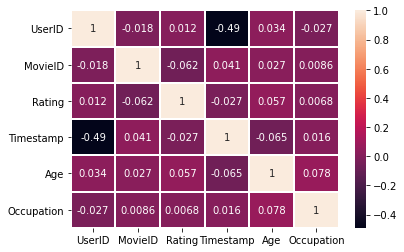

In [17]:
corr
sns.heatmap(corr,annot=True,linewidths=1)

In [18]:
#finding the unique values in each columns
def unique(x):
    for i in x.columns:
        print(i,'\n Unique values: ',x[i].unique(),'\n total unique values:',x[i].nunique())
        
print(unique(masterdf))

UserID 
 Unique values:  [  23.   49.   53. ... 2982. 3893. 4211.] 
 total unique values: 6039
MovieID 
 Unique values:  [ 661  914 3408 ... 2845 3607 2909] 
 total unique values: 3705
Rating 
 Unique values:  [2. 3. 5. 4. 1.] 
 total unique values: 5
Timestamp 
 Unique values:  [9.78460739e+08 9.77972750e+08 9.77979726e+08 ... 9.58846401e+08
 9.76029116e+08 9.57273353e+08] 
 total unique values: 457969
Gender 
 Unique values:  ['M' 'F'] 
 total unique values: 2
Age 
 Unique values:  [35. 18. 25. 50.  1. 45. 56.] 
 total unique values: 7
Occupation 
 Unique values:  [ 0. 12. 19.  2.  1. 18. 10.  4. 20.  7.  5. 17. 14. 11.  6.  8.  3. 16.
 15. 13.  9.] 
 total unique values: 21
Zip-code 
 Unique values:  ['90049' '77084' '96931' ... '74403' '79401' '77662'] 
 total unique values: 3439
Title 
 Unique values:  ['James and the Giant Peach (1996)' 'My Fair Lady (1964)'
 'Erin Brockovich (2000)' ... 'White Boys (1999)'
 'One Little Indian (1973)' 'Five Wives, Three Secretaries and Me (1998)'

# Exploring datasets using visual representation

User Age Distribution

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

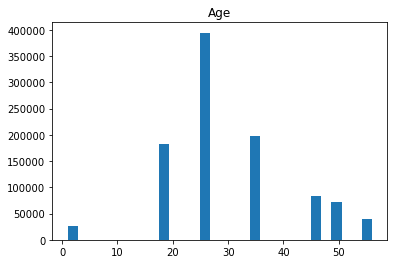

In [19]:
masterdf.hist('Age',grid=False,bins=30)


In [20]:
#Majority of the users are of the age 25 year.

In [21]:
gender_group=masterdf.groupby('Gender').size()
gender_group

Gender
F    245797
M    752283
dtype: int64

(array([4331.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1708.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

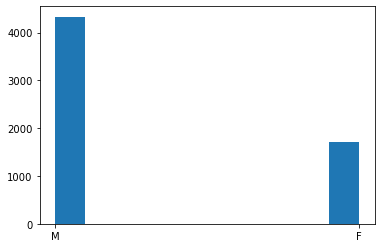

In [22]:
plt.hist(data=gender_group,x=[users.Gender])

In [23]:
#Maximum users are male 

User rating of the movie “Toy Story”

In [24]:
user_rating=ratings.groupby('UserID').size()
user_rating
user_rating.head(25)

UserID
1      52
2     129
3      51
4      21
5     198
6      71
7      31
8     139
9     106
10    401
11    137
12     23
13    108
14     25
15    201
16     35
17    211
18    305
19    255
20     24
21     22
22    297
23    304
24    136
25     85
dtype: int64

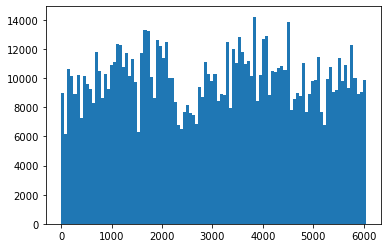

In [25]:
#plotting histogram of userratings
plt.hist(data=user_rating,x=[ratings.UserID],bins=100)
plt.show()

In [26]:
toystory=ratings[ratings.MovieID==1]
toystory

,UserID,MovieID,Rating,Timestamp
39,1,1,5,978824268
468,6,1,4,978237008
580,8,1,4,978233496
710,9,1,5,978225952
836,10,1,5,978226474
...,...,...,...,...
997247,6022,1,5,956755763
997540,6025,1,5,956812867
998169,6032,1,4,956718127
998359,6035,1,4,956712849


In [27]:
toystory.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [28]:
#toystory is mostly rated in the range of 4 to 5 by most users

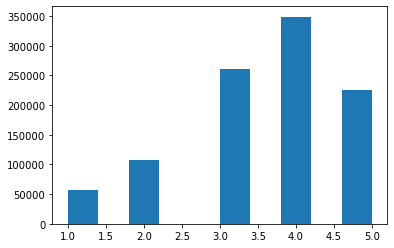

In [29]:
plt.hist(data=toystory,x=[ratings.Rating])
plt.show()

In [30]:
#toystory has got the maximum rating 4

In [31]:
user_ratings=ratings.merge(users,how='outer',on='UserID')

Top 25 movies by viewership rating

In [32]:
mr=ratings.groupby('MovieID',as_index=False)

In [33]:
agg_movierating=mr.agg({'Rating':'mean'})

In [34]:
top_25=agg_movierating.sort_values(by='Rating',ascending=False).head(25)

In [35]:
top_25

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


In [36]:
top_25.merge(movies,how='left',on='MovieID')

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


In [37]:
#merging ratings and movies dateset
movie_rating=pd.merge(movies,ratings,how='left',on='MovieID')
movie_rating.groupby('Title')['Rating'].count()

Title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zero Effect (1998)                            301
Zero Kelvin (Kj�rlighetens kj�tere) (1995)      2
Zeus and Roxanne (1997)                        23
Zone 39 (1997)                                  0
eXistenZ (1999)                               410
Name: Rating, Length: 3882, dtype: int64

In [38]:
#these are the top 25 movies with highest viewership ratings

Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [39]:
user2696=ratings[ratings['UserID']==2696]

In [40]:
user2696

,UserID,MovieID,Rating,Timestamp
440666,2696,1258,4,973308710
440667,2696,1270,2,973308676
440668,2696,1617,4,973308842
440669,2696,1625,4,973308842
440670,2696,1644,2,973308920
440671,2696,1645,4,973308904
440672,2696,1805,4,973308886
440673,2696,1892,4,973308904
440674,2696,800,5,973308842
440675,2696,2338,2,973308920


In [41]:
#above are the ratings given by the user 2696

# Feature engineering

Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [42]:
genre_list=movies.Genres.str.split('|').values

In [43]:
genre_list

array([list(['Adventure', "Children's", 'Fantasy']),
       list(['Comedy', 'Romance']), list(['Comedy', 'Drama']), ...,
       list(['Drama']), list(['Drama']), list(['Drama', 'Thriller'])],
      dtype=object)

In [44]:
movie_rating.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10.0,5.0,979168267.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,13.0,3.0,978202563.0
2,2,Jumanji (1995),Adventure|Children's|Fantasy,18.0,2.0,978152541.0
3,2,Jumanji (1995),Adventure|Children's|Fantasy,23.0,2.0,978461604.0
4,2,Jumanji (1995),Adventure|Children's|Fantasy,27.0,1.0,978129692.0


In [45]:
movie_rating['Genres'].value_counts().head()

Comedy            116905
Drama             111506
Comedy|Romance     42716
Comedy|Drama       42254
Drama|Romance      29173
Name: Genres, dtype: int64

In [46]:
movie_rating['Genres'].unique()

array(["Adventure|Children's|Fantasy", 'Comedy|Romance', 'Comedy|Drama',
       'Comedy', 'Action|Crime|Thriller', "Adventure|Children's",
       'Action', 'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama|Mystery|Roma

In [47]:
movie_rating['Genres'].nunique()

301

# Genre category with one hot encoding

In [48]:
masterdf.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
1,23.0,661,2.0,978460739.0,M,35.0,0.0,90049,James and the Giant Peach (1996),Animation|Children's|Musical
2,49.0,661,3.0,977972750.0,M,18.0,12.0,77084,James and the Giant Peach (1996),Animation|Children's|Musical
3,53.0,661,5.0,977979726.0,M,25.0,0.0,96931,James and the Giant Peach (1996),Animation|Children's|Musical
4,57.0,661,4.0,977935511.0,M,18.0,19.0,30350,James and the Giant Peach (1996),Animation|Children's|Musical
5,58.0,661,5.0,977939066.0,M,25.0,2.0,30303,James and the Giant Peach (1996),Animation|Children's|Musical


In [49]:
genre_selected_features=masterdf[['Gender','Age','Occupation','Rating','Genres']]

In [50]:
genre_selected_features.head()

,Gender,Age,Occupation,Rating,Genres
1,M,35.0,0.0,2.0,Animation|Children's|Musical
2,M,18.0,12.0,3.0,Animation|Children's|Musical
3,M,25.0,0.0,5.0,Animation|Children's|Musical
4,M,18.0,19.0,4.0,Animation|Children's|Musical
5,M,25.0,2.0,5.0,Animation|Children's|Musical


In [51]:
#splitting genre with one hot encoding
genre=genre_selected_features['Genres']

In [52]:
genre=genre.str.get_dummies().add_prefix('Genre_')

In [53]:
genre

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000203,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1000205,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1000206,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [54]:
#dropping genre column and adding encoded column
genre_selected_features.head()

,Gender,Age,Occupation,Rating,Genres
1,M,35.0,0.0,2.0,Animation|Children's|Musical
2,M,18.0,12.0,3.0,Animation|Children's|Musical
3,M,25.0,0.0,5.0,Animation|Children's|Musical
4,M,18.0,19.0,4.0,Animation|Children's|Musical
5,M,25.0,2.0,5.0,Animation|Children's|Musical


In [55]:
genre_selected_features=genre_selected_features.drop(['Genres'],axis=1)

In [56]:
genre_selected_features=pd.concat([genre_selected_features,genre],axis=1)

In [57]:
genre_selected_features.head()

,Gender,Age,Occupation,Rating,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
1,M,35.0,0.0,2.0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,M,18.0,12.0,3.0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,M,25.0,0.0,5.0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,M,18.0,19.0,4.0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,M,25.0,2.0,5.0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
#encoding gender column
gender=genre_selected_features['Gender']

In [59]:
gender=gender.str.get_dummies()

In [60]:
genre_selected_features=genre_selected_features.drop(['Gender'],axis=1)

In [61]:
genre_selected_features=pd.concat([genre_selected_features,gender],axis=1)

In [62]:
genre_selected_features.head()

,Age,Occupation,Rating,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western,F,M
1,35.0,0.0,2.0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,18.0,12.0,3.0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,25.0,0.0,5.0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,18.0,19.0,4.0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,25.0,2.0,5.0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [63]:
genre_selected_features.columns

Index(['Age', 'Occupation', 'Rating', 'Genre_Action', 'Genre_Adventure',
       'Genre_Animation', 'Genre_Children's', 'Genre_Comedy', 'Genre_Crime',
       'Genre_Documentary', 'Genre_Drama', 'Genre_Fantasy', 'Genre_Film-Noir',
       'Genre_Horror', 'Genre_Musical', 'Genre_Mystery', 'Genre_Romance',
       'Genre_Sci-Fi', 'Genre_Thriller', 'Genre_War', 'Genre_Western', 'F',
       'M'],
      dtype='object')

# Determine the features affecting the ratings of any particular movie.


In [64]:
genre_selected_features.dtypes

Age                  float64
Occupation           float64
Rating               float64
Genre_Action           int64
Genre_Adventure        int64
Genre_Animation        int64
Genre_Children's       int64
Genre_Comedy           int64
Genre_Crime            int64
Genre_Documentary      int64
Genre_Drama            int64
Genre_Fantasy          int64
Genre_Film-Noir        int64
Genre_Horror           int64
Genre_Musical          int64
Genre_Mystery          int64
Genre_Romance          int64
Genre_Sci-Fi           int64
Genre_Thriller         int64
Genre_War              int64
Genre_Western          int64
F                      int64
M                      int64
dtype: object

<AxesSubplot:>

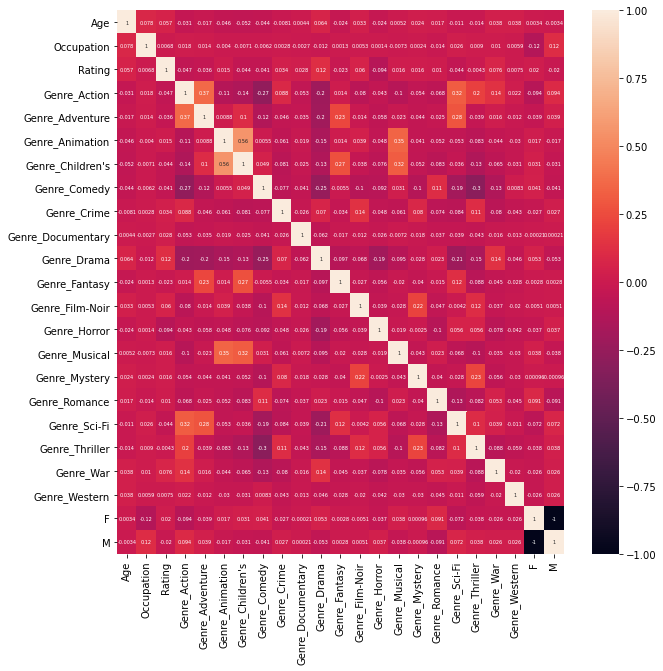

In [65]:
corr=genre_selected_features.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,annot_kws={'size':5})

In [66]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression(copy_X=True,
    fit_intercept=True,
    n_jobs=1,
    normalize=False)
from sklearn import metrics
X_feature=genre_selected_features.drop(['Rating'],axis=1)
Y_target=genre_selected_features['Rating']

In [67]:
print(X_feature.shape)

(998080, 22)


In [68]:
print(Y_target.shape)

(998080,)


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(X_feature,Y_target,test_size=0.20,random_state=1)

In [71]:
print(x_train.shape)

(798464, 22)


In [72]:
print(y_train.shape)

(798464,)


In [73]:
linreg=LinearRegression()

In [74]:
linreg.fit(x_train,y_train)

LinearRegression()

In [75]:
y_pred=linreg.predict(x_test)

In [76]:
y_pred

array([3.1391135 , 3.47791615, 3.71623546, ..., 3.45883683, 3.47791615,
       3.58430295])

Evaluation

In [77]:
print(
    'y-intercept: ',
    linreg.intercept_
)
print(
    'Beta coefficients: ',
    linreg.coef_
)
print(
    'Mean Abs Error  MAE: ',
    metrics.mean_absolute_error(y_test, y_pred)
)
print(
    'Mean Sq Error  MSE: ',
    metrics.mean_squared_error(y_test, y_pred)
)
print(
    'Root Mean Sq Error RMSE:',
    np.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
print(
    'r2 value: ',
    metrics.r2_score(y_test, y_pred)
)

y-intercept:  3.3862450428990685
Beta coefficients:  [ 0.00395234  0.00105708 -0.10010577  0.01253962  0.33838804 -0.32989152
 -0.0189966   0.09593112  0.40591819  0.23154365  0.07089041  0.43437292
 -0.28623038  0.16973792  0.01058865 -0.00858707 -0.0237295   0.05840676
  0.28828129  0.11891568  0.01727501 -0.01727501]
Mean Abs Error  MAE:  0.9016902215542625
Mean Sq Error  MSE:  1.2031258583071798
Root Mean Sq Error RMSE: 1.0968709396766694
r2 value:  0.038807873250019775


In [78]:
#Age, and Occupation are the main features affecting the ratings for the movies


In [79]:
prediction_df = pd.DataFrame({'Test': y_test, 'Prediction': y_pred})
prediction_df.head(25)

,Test,Prediction
702004,1.0,3.139113
716162,2.0,3.477916
665830,2.0,3.716235
862314,3.0,3.239042
901130,5.0,3.692880
227343,4.0,4.256250
795335,5.0,4.081555
300570,3.0,3.463581
380369,4.0,3.456074
354846,3.0,3.692849


In [81]:
#running naive bayes classifier
from sklearn.naive_bayes import GaussianNB
GN=GaussianNB()

In [82]:
GN.fit(x_train,y_train)

GaussianNB()

In [85]:
GN_predict=GN.predict(x_test)

In [86]:
#accuracy on x_test
accuracy=GN.score(x_test,y_test)

In [87]:
accuracy

0.2826727316447579

In [89]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,GN_predict)

cm

In [90]:
cm

array([[ 2553,  1534,  3722,  2538,  1029],
       [ 3450,  2917,  7270,  5750,  2100],
       [ 6338,  6113, 17030, 16251,  6269],
       [ 6407,  7222, 21225, 24166, 10753],
       [ 3313,  4125, 11086, 16695,  9760]], dtype=int64)

In [98]:
#running a logistiv regreression model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [99]:
logreg.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
y_pred=logreg.predict(x_test)

In [101]:
print(y_pred)

[3. 4. 4. ... 4. 4. 4.]


In [102]:
accu=logreg.score(x_test,y_test)

In [103]:
accu

0.35053302340493747

In [104]:
print(
    'y-intercept: ',
    logreg.intercept_
)
print(
    'Beta coefficients: ',
    logreg.coef_
)
print(
    'Mean Abs Error  MAE: ',
    metrics.mean_absolute_error(y_test, y_pred)
)
print(
    'Mean Sq Error  MSE: ',
    metrics.mean_squared_error(y_test, y_pred)
)
print(
    'Root Mean Sq Error RMSE:',
    np.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
print(
    'r2 value: ',
    metrics.r2_score(y_test, y_pred)
)

y-intercept:  [-0.36833576 -0.19213263  0.17295615  0.31904767  0.06846456]
Beta coefficients:  [[-1.15017331e-02 -3.22120620e-03  4.02296032e-02 -3.05497224e-02
  -1.08553099e-01  1.42153993e-01 -2.73960973e-02 -1.37006527e-01
  -3.29537152e-02 -5.12301943e-01 -1.70109585e-02 -1.01746002e-01
   3.94205081e-01 -6.29474903e-02 -6.73219837e-02 -1.81199005e-01
   6.01304885e-02 -1.63568940e-01 -1.19397987e-01 -1.89712447e-02
  -1.84763039e-01 -1.83537331e-01]
 [-4.68159677e-03 -1.30603609e-03  8.79822318e-02  9.32350252e-03
  -1.63658378e-01  6.15027682e-02  6.71688289e-02 -6.37183499e-02
  -6.13045186e-02 -1.35723030e-01  3.58397202e-02 -1.44112969e-01
   1.94295051e-01 -1.02767769e-01 -2.16284190e-02  3.53305536e-02
   3.47397645e-02 -1.34754199e-02 -1.90526079e-01 -4.93202960e-02
  -1.30774013e-01 -6.13306967e-02]
 [ 4.33995230e-03  4.75460846e-04  7.33874477e-02  3.85635994e-02
  -3.69906905e-02  1.12964238e-01  4.40558372e-02 -2.14958724e-02
  -7.31316825e-02  8.20147710e-02  3.24294